## Notebook


In [371]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

#import bisect

 
import pandas as pd
import pywt
import sys
import tsfel
import math
df_100 = pd.read_csv('107.csv')
data = df_100["\'MLII\'"].to_numpy()
index = df_100["\'sample #\'"].to_numpy()



maximum level is 16


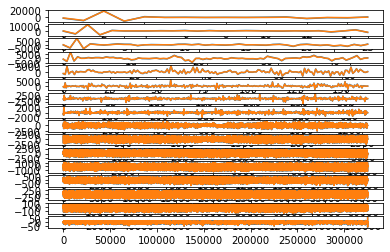

In [372]:
#Denoising
#https://github.com/MProx/Wavelet-denoising/blob/master/wavelets.py


# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)

#cA = pywt.threshold(cA, threshold*max(cA))

plt.figure()
for i in range(1, len(coeffs)):
    plt.subplot(maxlev, 1, i)
    plt.plot(coeffs[i])
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    plt.plot(coeffs[i])


datarec = pywt.waverec(coeffs, 'sym4')

mintime = 4000
maxtime = mintime + 1000


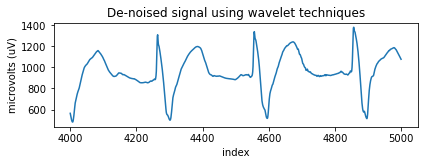

In [373]:
plt.subplot(2, 1, 2)
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
plt.xlabel('index')
plt.ylabel('microvolts (uV)')
plt.title("De-noised signal using wavelet techniques")
plt.tight_layout()
plt.show()

In [377]:
peaks, _=find_peaks(datarec,height=0)

In [378]:
# this section finds the part of Peaks that represent the indexes needed from min to max time
b=0
for i in peaks:    
    if (i<mintime):
        start=b+1
    elif (i>maxtime):
        end=b
        break
    b+=1
print(start,end)

127 165


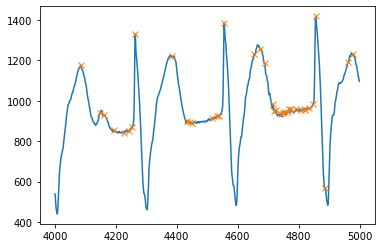

In [379]:
#plots the data along with the peaks
plt.plot(index[mintime:maxtime], data[mintime:maxtime])
plt.plot(peaks[start:end], data[peaks[start:end]], "x")
plt.show()

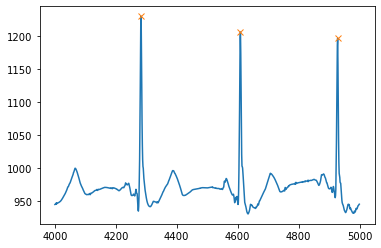

In [364]:
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
plt.plot(peaks[start:end], datarec[peaks[start:end]], "x")
plt.show()

In [365]:
minutes=len(index)/1000/60
AVG_BPM=len(peaks)/minutes
print(int(AVG_BPM))

178


In [366]:
AVG_BPM=(end-start)*1000*60/(maxtime-mintime)
print(int(AVG_BPM))

180


31634
31467
31801


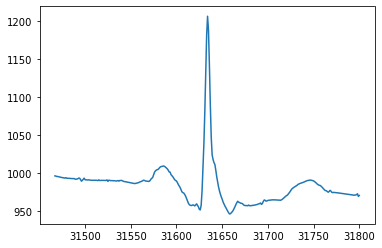

In [370]:
windowLength=len(index)/len(peaks)

#if you want to look at a specific heart beat

beat=102
w2=int(windowLength/2)
left=peaks[beat]-w2
right =peaks[beat]+w2
print(peaks[beat])
print(left)
print(right)

plt.plot(index[left:right],datarec[left:right])
